In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, '..')


### Load Data

In [2]:
roles_wide = pd.read_csv("../../../dataV2/combined_V1_V2.csv", na_filter=False)
roles_wide.drop("Unnamed: 0", inplace=True, axis=1)

roles_wide.rename({"Sentence": "sentence", "Arg.Phrase": "arg"}, axis=1, inplace=True)

properties_list = ['awareness', 'change_of_location', 'change_of_state',
       'change_of_possession', 'existed_after', 'existed_before',
       'existed_during', 'instigation', 'sentient', 'volition']

print(roles_wide.shape)
roles_wide["combined_labels"] = roles_wide["combined_labels"].apply(lambda x: eval(x))
roles_wide.head()


(28816, 17)


,Sentence.ID,Roleset,Gram.Func,sentence,Predicate,Split,arg,Arg.Stripped,Arg,arg_idx,verb_idx,structure,decomp_version,Pred.Lemma,modified_sentence,combined_labels,VN_mappings
0,0003_21,impose.01,nsubj,"In July , a gradual ban was imposed by the Env...",was imposed by,test,a gradual ban,a ban,1,"(3, 6)","(6, 9)",passive_full,V1,impose,1,"[1.0, 1.0, 3.0, 1.0, 5.0, 1.0, 5.0, 1.0, 1.0, ...",
1,0003_21,impose.01,dobj,"In July , a gradual ban was imposed by the Env...",was imposed by,train,the Environmental Protection Agency,the Environmental Protection Agency,0,"(9, 13)","(6, 9)",passive_full,V1,impose,1,"[5.0, 1.0, 3.0, 1.0, 5.0, 5.0, 5.0, 5.0, 1.0, ...",
2,0003_29,have.03,nsubj,No bearing on our work force today is had by it .,is had by,train,No bearing on our work force today,no bearing,1,"(0, 7)","(7, 10)",passive_full,V1,have,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",
3,0003_29,have.03,dobj,No bearing on our work force today is had by it .,is had by,test,it,It,0,"(10, 11)","(7, 10)",passive_full,V1,have,1,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, ...",
4,0003_9,lead.02,nsubj,A team of researchers from the National Cancer...,was led by,train,A team of researchers from the National Cancer...,a team,1,"(0, 19)","(19, 22)",passive_full,V1,lead,1,"[5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 5.0, 3.0, 1.0, ...",


In [3]:
eval_df = roles_wide.loc[
    (roles_wide["decomp_version"] == "V2") & \
    (roles_wide["Split"] == "test")
    ][["Pred.Lemma", "Gram.Func", "structure", "sentence", "Predicate", "arg_idx", "verb_idx", "arg", "Arg.Stripped", "Sentence.ID"]].reset_index().drop_duplicates()[["index", "Pred.Lemma", "Sentence.ID", "Gram.Func", "Arg.Stripped"]]

print(eval_df.shape)
eval_df.head()


(1748, 5)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl
1,14300,raise,en-ud-test.conllu 1002,nsubj,A girl
2,14301,raise,en-ud-test.conllu 1002,dobj,the hand
3,14302,raise,en-ud-test.conllu 1002,dobj,the hand
4,14303,be,en-ud-test.conllu 1004,nsubj,that


In [4]:
verbnet_semantics = pd.read_csv("../../../dataV2/pd_verbnet_semantics.csv",
                                na_filter=False, index_col=0)[[
                                    "Sentence.ID", "Pred.Lemma", "Arg.Stripped", "has_mapping",
                                    "animate_STR", "animate_WK",
                                    "verb_possession", "verb_location", "verb_state",
                                ] + properties_list]
verbnet_semantics.head()

eval_df = pd.merge(eval_df, verbnet_semantics,
                   on=["Sentence.ID", "Pred.Lemma", "Arg.Stripped"])
print(eval_df.shape)
eval_df.head()


(3480, 21)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,awareness,change_of_location,change_of_state,change_of_possession,existed_after,existed_before,existed_during,instigation,sentient,volition
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,3.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0
2,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,3.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0
3,14300,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0
4,14301,raise,en-ud-test.conllu 1002,dobj,the hand,True,False,False,False,False,...,1.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0


## Animacy selectional restrictions

### roberta-dropout=0.1

In [5]:
contributions_df = pd.read_csv("roberta_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["sentient", "instigation", "volition", "awareness"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    "modifier": "mod",
    "predicate": "pred",
    "other_arguments": "other"
}

contributions_df["span"] = contributions_df["span"].map(spans)
print(contributions_df.shape)
contributions_df.head()


(16024, 6)


,index,span,class,per_token_contribution,position,property
0,14299,arg,negative,-0.000000,agent,awareness
1,14301,arg,negative,0.428111,patient,awareness
2,14303,arg,negative,0.124684,agent,awareness
3,14305,arg,negative,-0.000000,agent,awareness
4,14307,arg,negative,-0.000000,agent,awareness


In [6]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(31632, 26)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,existed_before,existed_during,instigation,sentient,volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.0,agent,awareness
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,-0.0,agent,awareness
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,other,negative,-0.0,agent,awareness
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.0,agent,instigation
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,-0.0,agent,instigation


In [7]:
contributions_df["animate_WK"] = contributions_df.apply(
    lambda x: x["animate_WK"], axis=1
)
contributions_df["animate_STR"] = contributions_df.apply(
    lambda x: x["animate_STR"], axis=1
)

# keep only rows where the property rating is >3 and the contribution is to that property
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x[x["property"]]) > 3, axis=1
)

contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]
contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,existed_during,instigation,sentient,volition,span,class,per_token_contribution,position,property,has_contribution_property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,arg,negative,-0.0,agent,awareness,True
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,pred,negative,-0.0,agent,awareness,True
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,other,negative,-0.0,agent,awareness,True
6,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,arg,negative,-0.0,agent,sentient,True
7,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,pred,negative,-0.0,agent,sentient,True


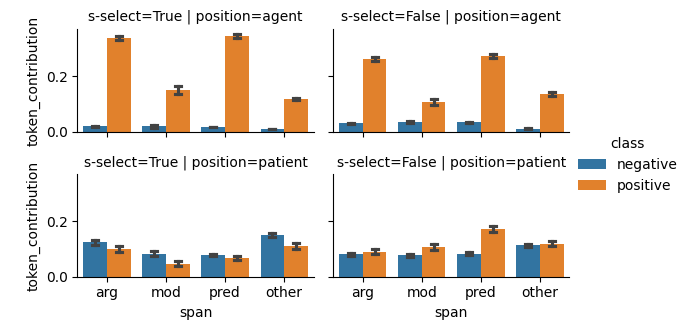

In [8]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="animate_WK", legend_out=True, hue = "class", 
    order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("s-select={col_name} | position={row_name}")


### gpt2

In [9]:
contributions_df = pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["sentient", "instigation", "volition", "awareness"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "predicate": "pred",
    "argument": "arg",
    "other_args": "other",
    "modifier": "mod"
}

contributions_df["span"] = contributions_df["span"].map(spans)
print(contributions_df.shape)
contributions_df.head()



(16072, 6)


,index,span,class,per_token_contribution,position,property
0,14299,arg,negative,-0.000000,agent,awareness
1,14301,arg,negative,-0.000000,patient,awareness
2,14303,arg,negative,0.214458,agent,awareness
3,14305,arg,negative,-0.000000,agent,awareness
4,14307,arg,negative,-0.000000,agent,awareness


In [10]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(31728, 26)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,existed_before,existed_during,instigation,sentient,volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,awareness
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,-0.000000,agent,awareness
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,other,negative,-0.000000,agent,awareness
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,0.091681,agent,instigation
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,0.027117,agent,instigation


In [11]:
contributions_df["animate_WK"] = contributions_df.apply(
    lambda x: x["animate_WK"], axis=1
)
contributions_df["animate_STR"] = contributions_df.apply(
    lambda x: x["animate_STR"], axis=1
)

# keep only rows where the property rating is >3 and the contribution is to that property
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x[x["property"]]) > 3, axis=1
)

contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]
contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,existed_during,instigation,sentient,volition,span,class,per_token_contribution,position,property,has_contribution_property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,awareness,True
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,pred,negative,-0.000000,agent,awareness,True
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,other,negative,-0.000000,agent,awareness,True
6,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,sentient,True
7,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,2.0,5.0,5.0,pred,negative,0.268605,agent,sentient,True


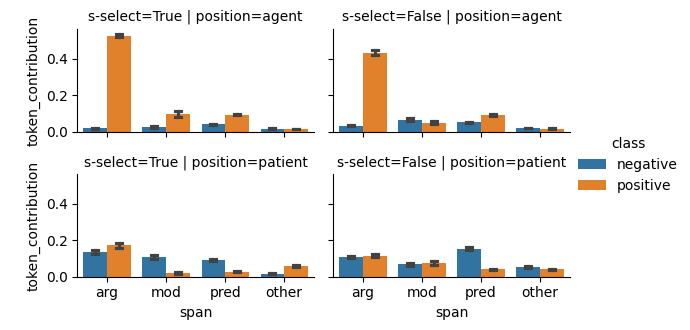

In [12]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="animate_WK", legend_out=True, hue = "class", 
    order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("s-select={col_name} | position={row_name}")


## Lexical semantics

### Roberta

In [13]:
pd.read_csv("roberta_gcd_contributions.csv", index_col=0)["property"].value_counts()


property
awareness             4006
changes_location      4006
changes_state         4006
changes_possession    4006
existed_after         4006
existed_before        4006
existed_during        4006
instigation           4006
sentient              4006
volition              4006
Name: count, dtype: int64

In [14]:
contributions_df = pd.read_csv("roberta_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["changes_location", "changes_state", "changes_possession"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    "modifier": "mod",
    "predicate": "pred",
    "other_arguments": "other"
}

contributions_df["span"] = contributions_df["span"].map(spans)
print(contributions_df.shape)
contributions_df.head()


(12018, 6)


,index,span,class,per_token_contribution,position,property
2003,14299,arg,negative,-0.000000,agent,changes_location
2004,14301,arg,negative,-0.000000,patient,changes_location
2005,14303,arg,negative,0.237324,agent,changes_location
2006,14305,arg,negative,0.078642,agent,changes_location
2007,14307,arg,negative,-0.000000,agent,changes_location


In [15]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(23724, 26)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,existed_before,existed_during,instigation,sentient,volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,changes_location
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,0.319002,agent,changes_location
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,other,negative,-0.000000,agent,changes_location
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,changes_state
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,0.378748,agent,changes_state


In [16]:
# keep only rows where the property rating is >3 and the contribution is to that property
# contributions_df["property"] = contributions_df["property"].apply(
#     lambda x: x.replace("changes", "change_of")
# )
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x[x["property"].replace("changes", "change_of")]) > 3, axis=1
)

contributions_df["lexically_entailed"] = contributions_df.apply(
    lambda x: x["verb_" + x["property"].split("_")[-1]], axis=1
)


contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]

contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,instigation,sentient,volition,span,class,per_token_contribution,position,property,has_contribution_property,lexically_entailed
21,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,arg,negative,-0.000000,agent,changes_state,True,False
22,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,pred,negative,0.378748,agent,changes_state,True,False
23,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,other,negative,-0.000000,agent,changes_state,True,False
30,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,arg,positive,0.182514,agent,changes_state,True,False
31,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,pred,positive,0.393381,agent,changes_state,True,False


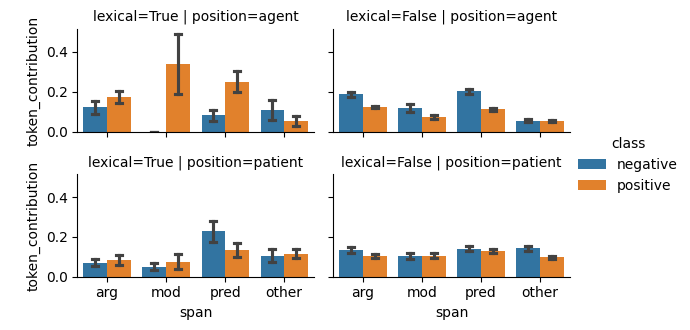

In [17]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        # & (contributions_df["property"] != "changes_possession")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="lexically_entailed", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


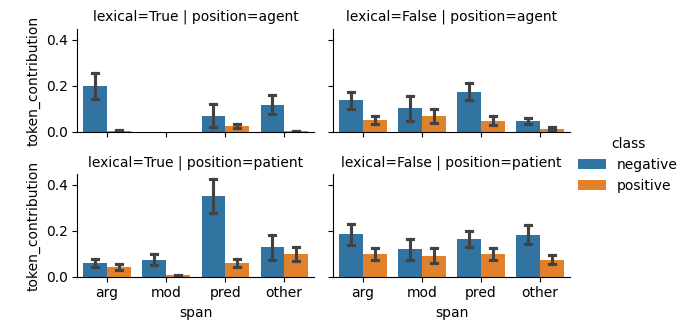

In [18]:

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "changes_possession")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_possession", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


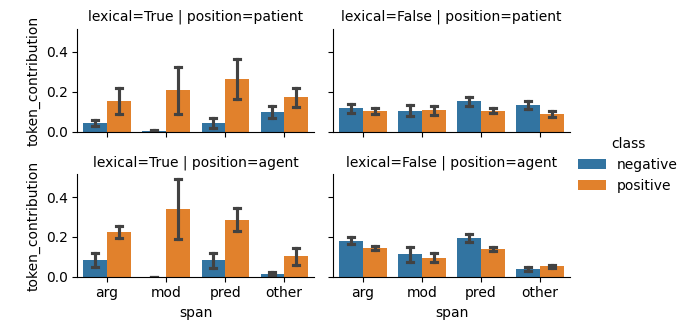

In [19]:
# change of location

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "changes_location")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_location", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


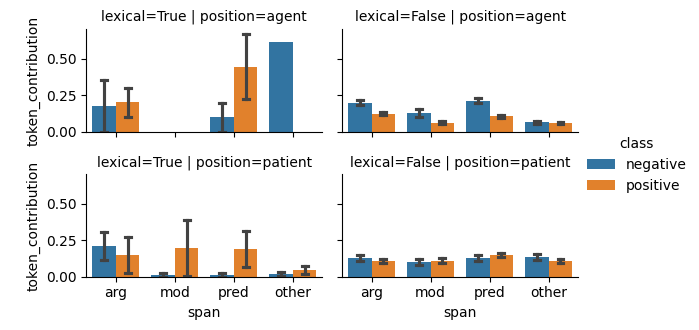

In [20]:
# change of state

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "changes_state")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_state", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


### GPT-2

In [21]:
pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)["property"].value_counts()


property
awareness               4018
change_of_location      4018
change_of_state         4018
change_of_possession    4018
existed_after           4018
existed_before          4018
existed_during          4018
instigation             4018
sentient                4018
volition                4018
Name: count, dtype: int64

In [22]:
contributions_df = pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)
contributions_df["span"].value_counts()


span
predicate     12780
argument      12500
other_args     9760
modifier       5140
Name: count, dtype: int64

In [23]:
contributions_df = pd.read_csv("gpt2_gcd_contributions.csv", index_col=0)
contributions_df = contributions_df.loc[
    contributions_df["property"].isin(["change_of_location", "change_of_state", "change_of_possession"])][[
    "index", "span", "class", "per_token_contribution", "position", "property"
]]

spans = {
    "argument": "arg",
    "modifier": "mod",
    "predicate": "pred",
    "other_args": "other"
}

contributions_df["span"] = contributions_df["span"].map(spans)
print(contributions_df.shape)
contributions_df.head()


(12054, 6)


,index,span,class,per_token_contribution,position,property
2009,14299,arg,negative,-0.000000,agent,change_of_location
2010,14301,arg,negative,-0.000000,patient,change_of_location
2011,14303,arg,negative,0.079244,agent,change_of_location
2012,14305,arg,negative,-0.000000,agent,change_of_location
2013,14307,arg,negative,-0.000000,agent,change_of_location


In [24]:
contributions_df = pd.merge(eval_df, contributions_df, on="index")
print(contributions_df.shape)
contributions_df.head()


(23796, 26)


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,existed_before,existed_during,instigation,sentient,volition,span,class,per_token_contribution,position,property
0,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,change_of_location
1,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,0.241992,agent,change_of_location
2,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,other,negative,-0.000000,agent,change_of_location
3,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,arg,negative,-0.000000,agent,change_of_state
4,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,2.0,5.0,5.0,pred,negative,0.201740,agent,change_of_state


In [25]:
# keep only rows where the property rating is >3 and the contribution is to that property
# contributions_df["property"] = contributions_df["property"].apply(
#     lambda x: x.replace("changes", "change_of")
# )
contributions_df["has_contribution_property"] = contributions_df.apply(
    lambda x: float(x[x["property"]]) > 3, axis=1
)

contributions_df["lexically_entailed"] = contributions_df.apply(
    lambda x: x["verb_" + x["property"].split("_")[-1]], axis=1
)


contributions_df = contributions_df.loc[
    contributions_df["has_contribution_property"] & 
    contributions_df["has_mapping"]]

contributions_df.head()


,index,Pred.Lemma,Sentence.ID,Gram.Func,Arg.Stripped,has_mapping,animate_STR,animate_WK,verb_possession,verb_location,...,instigation,sentient,volition,span,class,per_token_contribution,position,property,has_contribution_property,lexically_entailed
21,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,arg,negative,-0.000000,agent,change_of_state,True,False
22,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,pred,negative,0.201740,agent,change_of_state,True,False
23,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,other,negative,0.314328,agent,change_of_state,True,False
30,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,arg,positive,0.116999,agent,change_of_state,True,False
31,14299,raise,en-ud-test.conllu 1002,nsubj,A girl,True,True,True,False,False,...,5.0,5.0,5.0,pred,positive,0.067103,agent,change_of_state,True,False


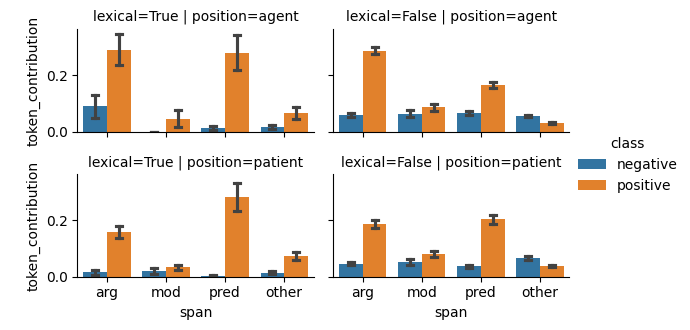

In [26]:
ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="lexically_entailed", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


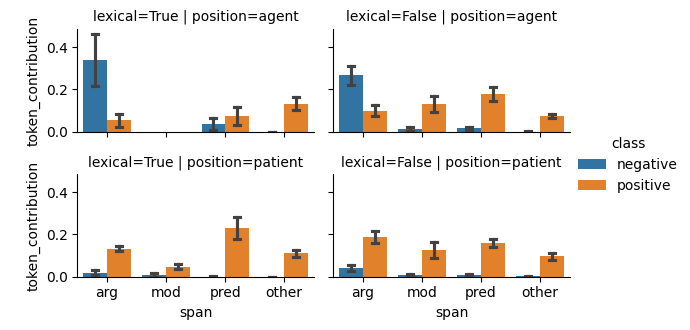

In [27]:

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "change_of_possession")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_possession", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


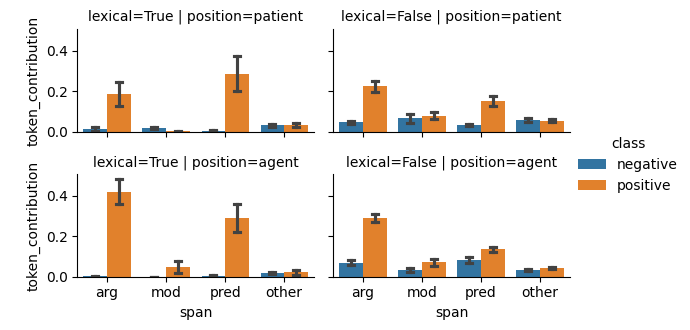

In [28]:
# change of location

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "change_of_location")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_location", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")


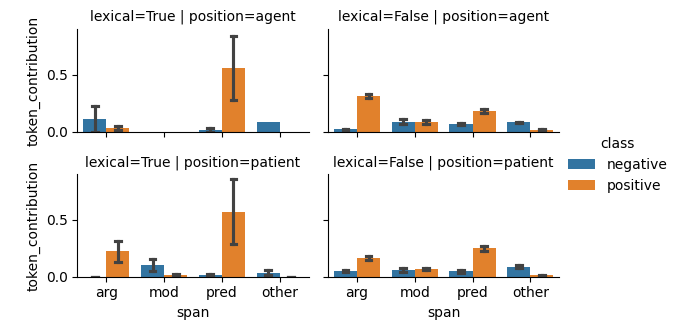

In [29]:
# change of state

ax = sns.catplot(
    contributions_df.loc[
        (contributions_df["Gram.Func"] != "iobj") & \
        (contributions_df["property"] == "change_of_state")
        ],
    x="span", kind="bar", orient="v",
    row="position",
    y = "per_token_contribution", errorbar="se", capsize=0.2, height=1.7, aspect=1.7,
    col="verb_state", legend_out=True, hue = "class", 
    col_order=["True", "False"], order=["arg", "mod", "pred", "other"]
    )
ax.set_ylabels("\ntoken_contribution")
ax.set_titles("lexical={col_name} | position={row_name}")
